In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
white_wine = pd.read_csv('/content/winequality-white.csv', sep=';')

In [3]:
#1
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
#2
white_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Text(0.5, 0, 'Quality')

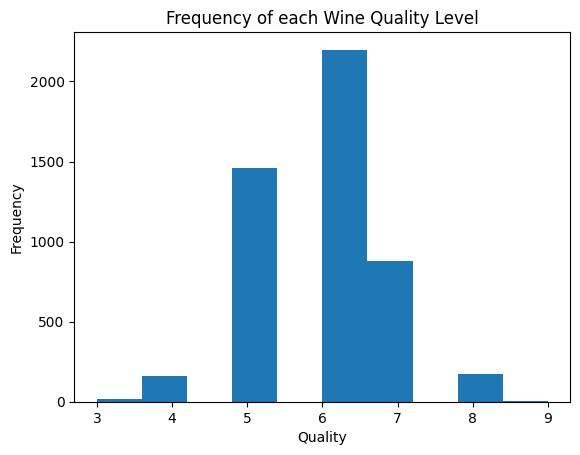

In [5]:
#3
ax = (white_wine['quality']).plot.hist()
plt.title('Frequency of each Wine Quality Level')
ax.set_xlabel('Quality')

Text(0.5, 1.0, 'Fixed Acidity Levels per Wine Quality')

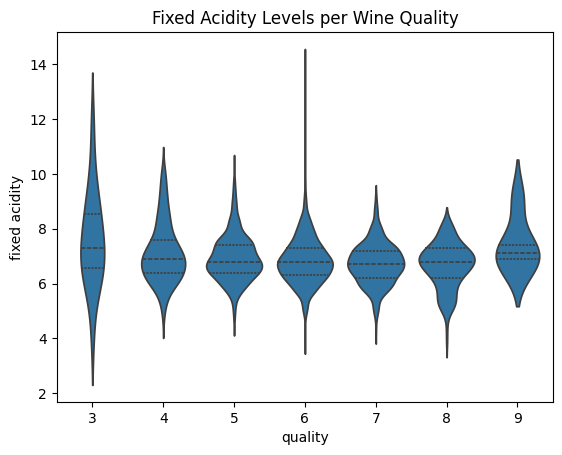

In [6]:
#4
sns.violinplot(data=white_wine, x='quality', y='fixed acidity', inner='quart').set_title('Fixed Acidity Levels per Wine Quality')

Text(0.5, 1.0, 'Volatile Acidity Levels per Wine Quality')

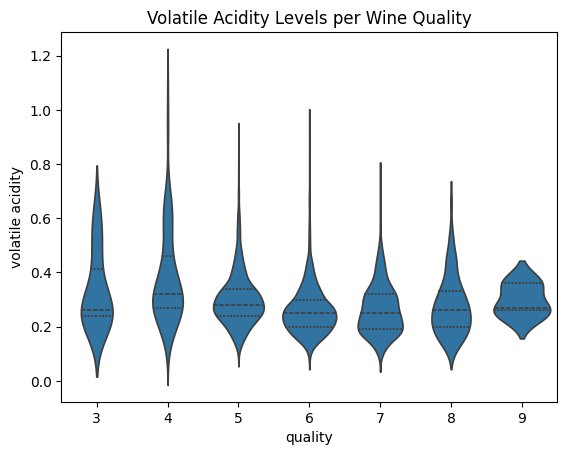

In [7]:
sns.violinplot(data=white_wine, x='quality', y='volatile acidity', inner='quart').set_title('Volatile Acidity Levels per Wine Quality')

Text(0.5, 1.0, 'Citric Acid Concentration per Wine Quality')

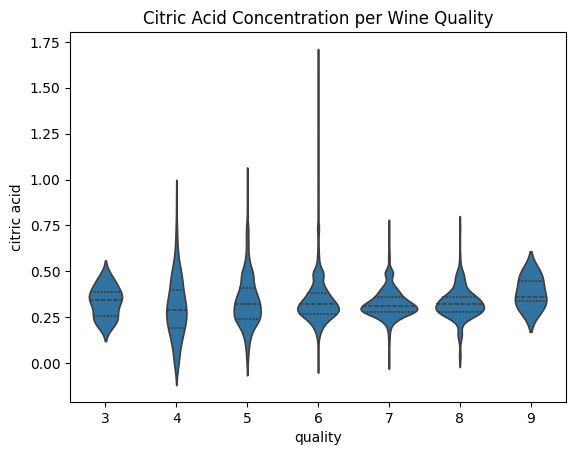

In [8]:
sns.violinplot(data=white_wine, x='quality', y='citric acid', inner='quart').set_title('Citric Acid Concentration per Wine Quality')

Text(0.5, 1.0, 'Residual Sugar Concentration per Wine Quality')

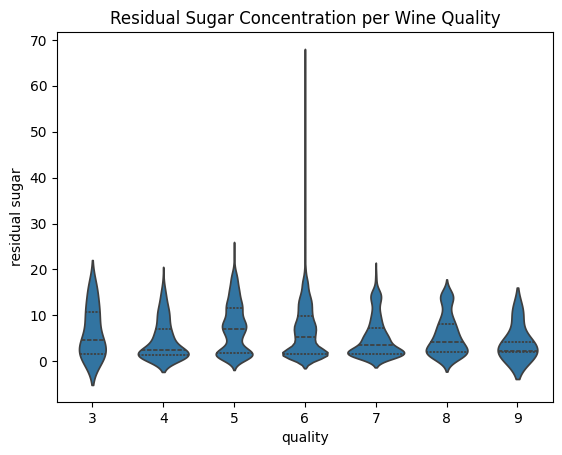

In [9]:
sns.violinplot(data=white_wine, x='quality', y='residual sugar', inner='quart').set_title('Residual Sugar Concentration per Wine Quality')

Text(0.5, 1.0, 'Chloride Concentration per Wine Quality')

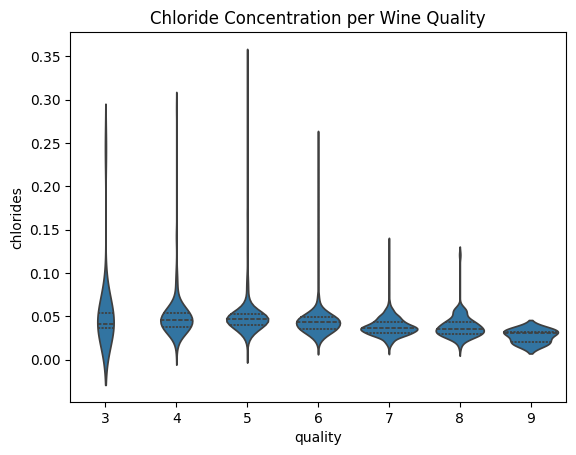

In [10]:
sns.violinplot(data=white_wine, x='quality', y='chlorides', inner='quart').set_title('Chloride Concentration per Wine Quality')

Text(0.5, 1.0, 'Free Sulfur Dioxide Levels per Wine Quality')

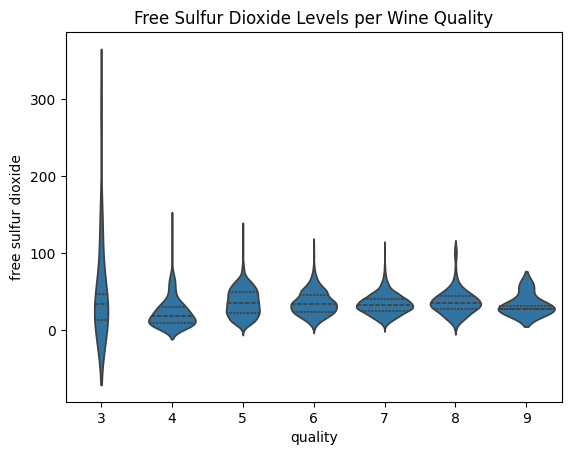

In [16]:
sns.violinplot(data=white_wine, x='quality', y='free sulfur dioxide', inner='quart').set_title('Free Sulfur Dioxide Levels per Wine Quality')

Text(0.5, 1.0, 'Total Sulfur Dioxide Levels per Wine Quality')

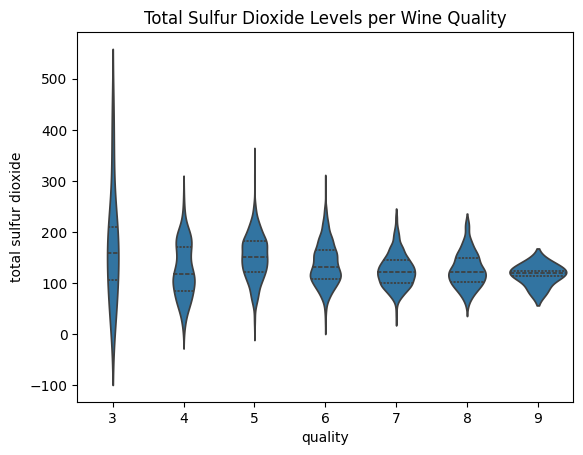

In [15]:
sns.violinplot(data=white_wine, x='quality', y='total sulfur dioxide', inner='quart').set_title('Total Sulfur Dioxide Levels per Wine Quality')

Text(0.5, 1.0, 'Density per Wine Quality')

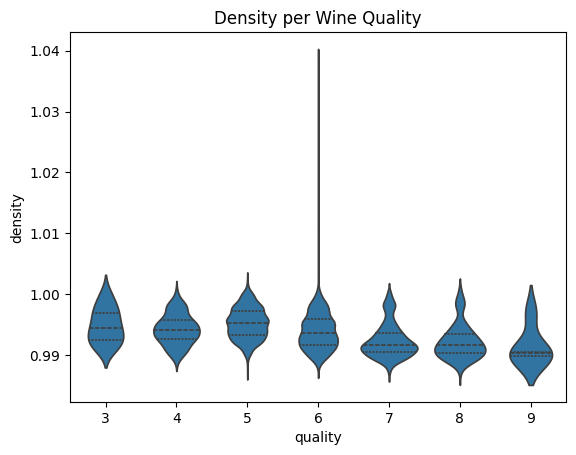

In [14]:
sns.violinplot(data=white_wine, x='quality', y='density', inner='quart').set_title('Density per Wine Quality')

Text(0.5, 1.0, 'pH Levels per Wine Quality')

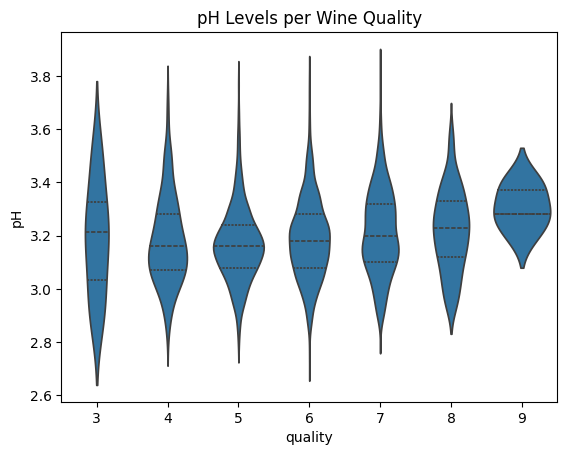

In [13]:
sns.violinplot(data=white_wine, x='quality', y='pH', inner='quart').set_title('pH Levels per Wine Quality')

Text(0.5, 1.0, 'Sulphate Concentration per Wine Quality')

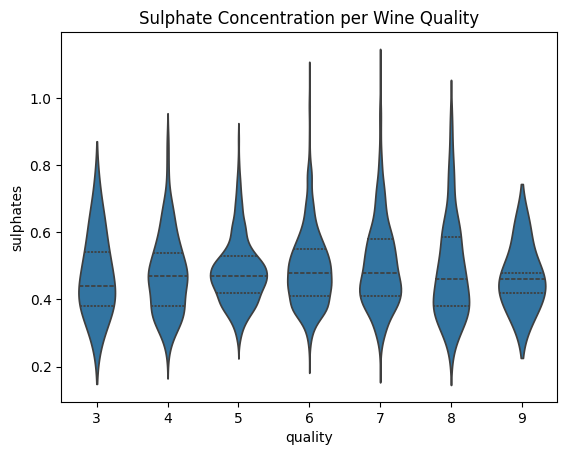

In [12]:
sns.violinplot(data=white_wine, x='quality', y='sulphates', inner='quart').set_title('Sulphate Concentration per Wine Quality')

Text(0.5, 1.0, 'Alcohol Content per Wine Quality')

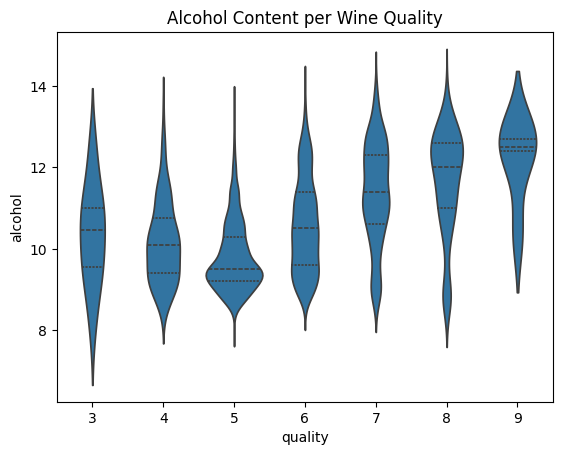

In [11]:
sns.violinplot(data=white_wine, x='quality', y='alcohol', inner='quart').set_title('Alcohol Content per Wine Quality')

Intercept = 2.582009399174922
Coefficient = 0.3134693019118325
RMSE = 0.7971284628753889 and r2 = 0.1897253327492563


Text(0.5, 1.0, 'Relationship Between Alcohol Content and Wine Quality')

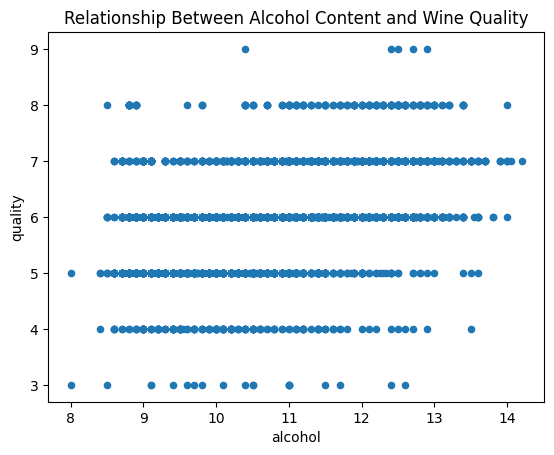

In [17]:
#5
model = LinearRegression()

model.fit(white_wine[['alcohol']], white_wine['quality'])

print(f'Intercept = {model.intercept_}')
print(f'Coefficient = {model.coef_[0]}')

fitted = model.predict(white_wine[['alcohol']])

RMSE = np.sqrt(mean_squared_error(white_wine['quality'], fitted))
r2 = r2_score(white_wine['quality'], fitted)

print(f'RMSE = {RMSE} and r2 = {r2}')

white_wine.plot.scatter(x='alcohol', y='quality')
plt.title('Relationship Between Alcohol Content and Wine Quality')

In [18]:
#6
X = white_wine[['volatile acidity', 'alcohol', 'density']]
y = white_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

fitted = model.predict(X_test)

MSE = mean_squared_error(y_test, fitted)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, fitted)

print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

print(f'RMSE = {RMSE} and r2 = {r2}')


Intercept: -37.49257502316353
Coefficients: [-2.1283253   0.39908483 40.00172502]
RMSE = 0.7652181198384326 and r2 = 0.24392629832553359
